# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

target='Loan_Status'

#go with soft prediction. Human still makes the ultimate call
# Yes / No  + probability of being true. 
# need soft prediction compatible algorimn to train the model. 

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [32]:
df.info() # to check on nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [61]:

df.describe() # to check on nulls 
df['LoanAmount']=df['LoanAmount']*100
df['ApplicantIncome']=df['ApplicantIncome']*12
df['CoapplicantIncome']=df['CoapplicantIncome']*12
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,64841.511401,19454.949576,14641.216216,342.00000,0.842199
std,73308.500081,35114.980431,8558.732524,65.12041,0.364878
min,1800.000000,0.000000,900.000000,12.00000,0.000000
25%,34530.000000,0.000000,10000.000000,360.00000,1.000000
50%,45750.000000,14262.000000,12800.000000,360.00000,1.000000
75%,69540.000000,27567.000000,16800.000000,360.00000,1.000000
max,972000.000000,500004.000000,70000.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



                Loan_ID
Credit_History         
0.0                  89
1.0                 475


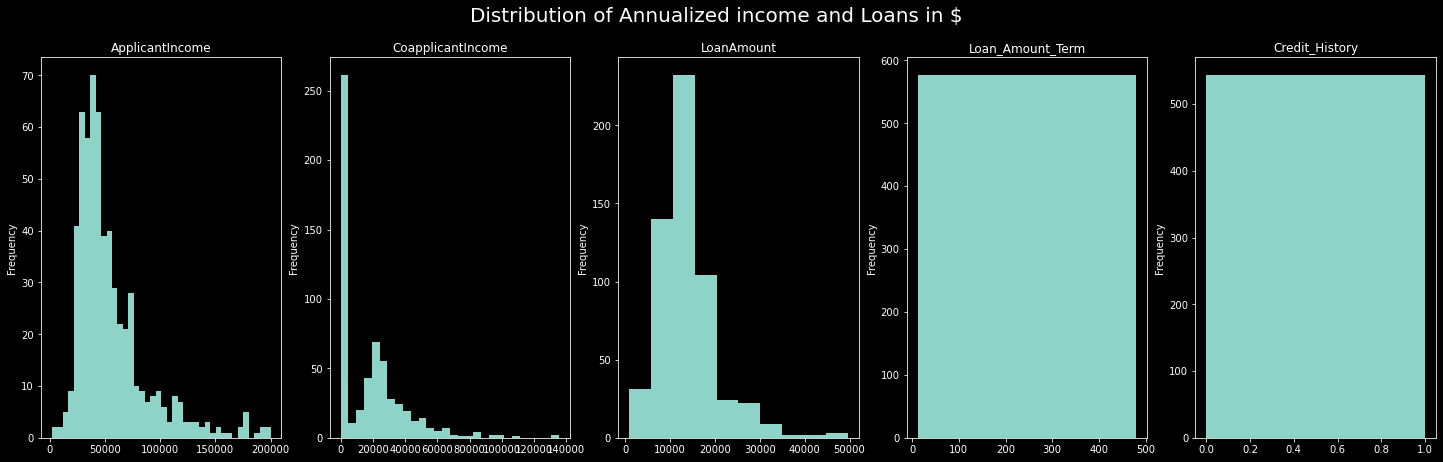

In [65]:
print(df[['Loan_ID','Credit_History']].groupby('Credit_History').count())
#give dnd to missing nominal values 
import math
numeric_variables = df.select_dtypes(include = ['number'])
w = 5000
numeric_variables = numeric_variables[numeric_variables['ApplicantIncome']<200000]
numeric_variables = numeric_variables[numeric_variables['CoapplicantIncome']<200000]


#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(numeric_variables.columns), figsize=(25,7))
for col, ax in zip(numeric_variables, axes):
    n = math.ceil((numeric_variables[col].max() - numeric_variables[col].min())/w)
    numeric_variables[col].sort_index().plot.hist(ax=ax, title=col,bins=n)
fig.suptitle("Distribution of Annualized income and Loans in $",size=20)    
    
plt.style.use('dark_background')
plt.show()



<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='Loan_Status'>

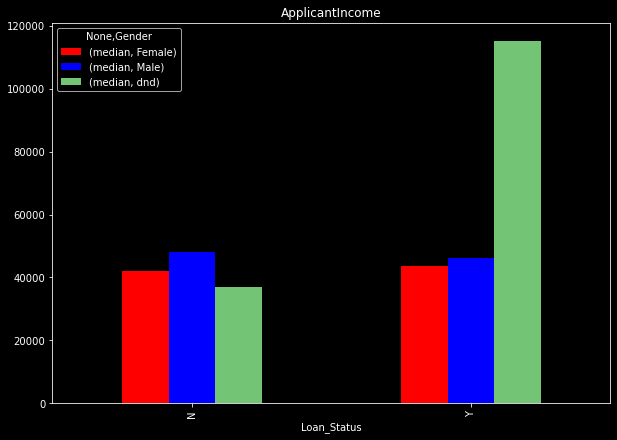

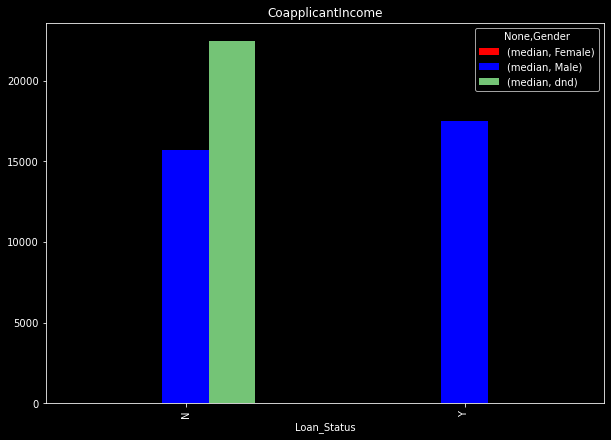

In [71]:


# colors = ["red", "blue","#74C476"]
# pivot_df = df.pivot_table(index='Loan_Status', columns='Gender', values='ApplicantIncome',aggfunc=['median'])
# pivot_df.plot.bar(title='ApplicantIncome', color=colors, figsize=(10,7))

colors = ["red", "blue","#74C476"]
pivot_df = df.pivot_table(index='Loan_Status', columns='Gender', values='CoapplicantIncome',aggfunc=['median'])
pivot_df.plot.bar(title='CoapplicantIncome' , color=colors, figsize=(10,7))


<bound method Figure.show of <Figure size 1440x720 with 3 Axes>>

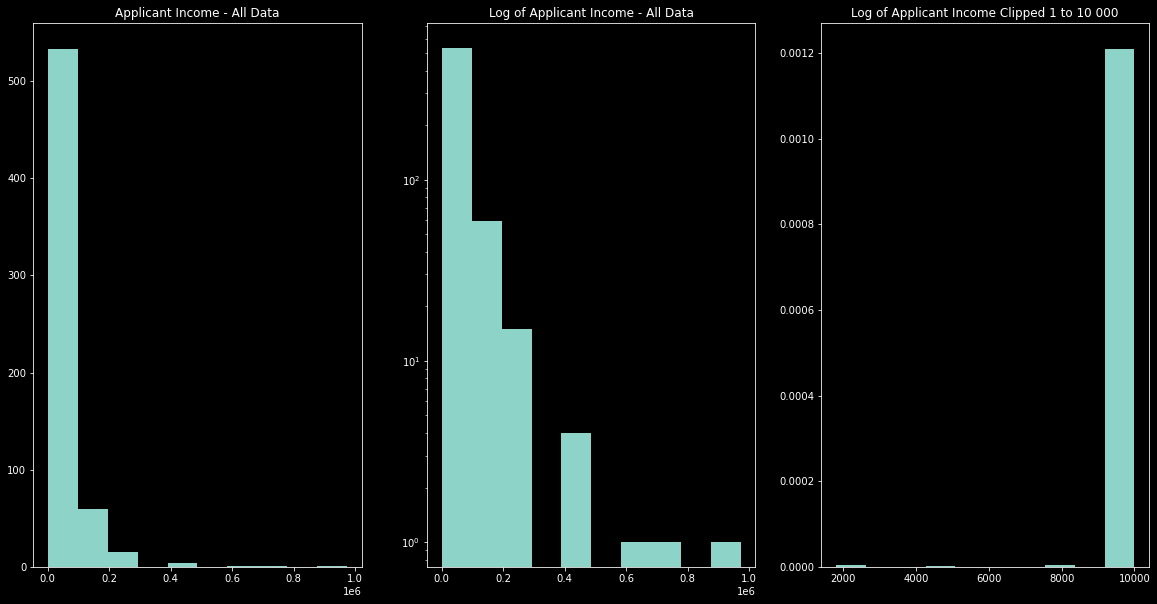

In [36]:

y=df['ApplicantIncome'] #.clip(1,15000)
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20, 10))
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 10))
plt.style.use('dark_background')
ax1.set_title("Applicant Income - All Data")
ax1.hist(y,bins=10,label="Applicant Income Distribution") # density=False would make counts
ax2.set_title("Log of Applicant Income - All Data")
ax2.hist(y,bins=10,label="Applicant Income Distribution",log=1) # density=False would make counts
ax3.set_title("Log of Applicant Income Clipped 1 to 10 000")
ax3.hist(y.clip(1,10000),bins=10,label="Applicant Income Distribution",density=True, histtype='bar', stacked=True) # density=False would make counts

fig.show



Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

/Users/digitalminimal/opt/miniconda3/envs/the_one/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


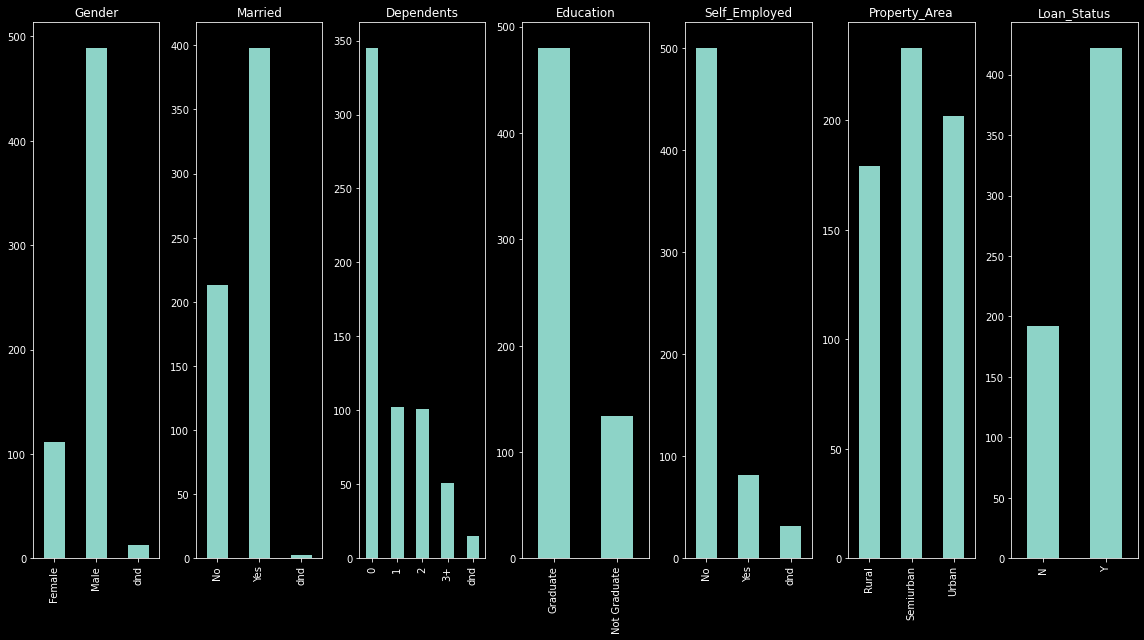

In [66]:


#give dnd to missing nominal values 
nominal_variables = df.select_dtypes(exclude = ['number'])
nominal_variables.drop('Loan_ID',axis=1,inplace=True)
for each in nominal_variables:
    df[each].fillna('dnd', inplace=True)

#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(nominal_variables.columns), figsize=(16,9))
for col, ax in zip(nominal_variables, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)
plt.tight_layout()    
plt.style.use('dark_background')
plt.show()



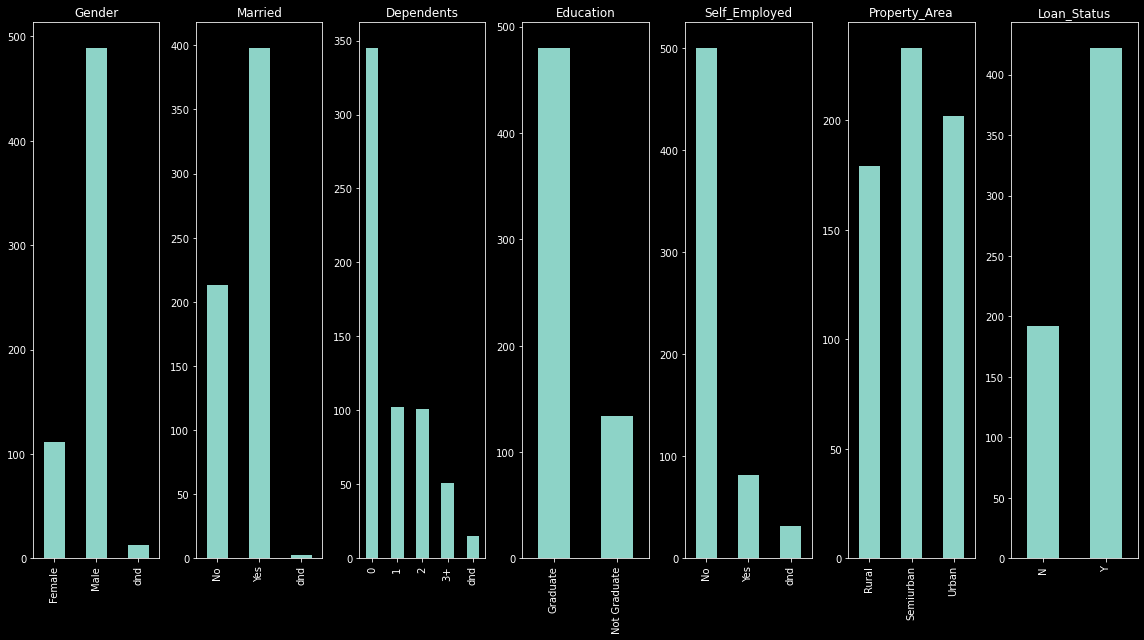

In [38]:
#loop true nominal columns then display an histogram
load_status_Y=nominal_variables[nominal_variables['Loan_Status']=='Y']
load_status_N=nominal_variables[nominal_variables['Loan_Status']=='N']

fig, axes = plt.subplots(ncols=len(load_status_Y.columns), figsize=(16,9))
fig.patch.set_facecolor('black')
for col, ax in zip(load_status_Y, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)
    ax.set_facecolor('black')
plt.tight_layout()    

plt.show()

/Users/digitalminimal/opt/miniconda3/envs/the_one/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


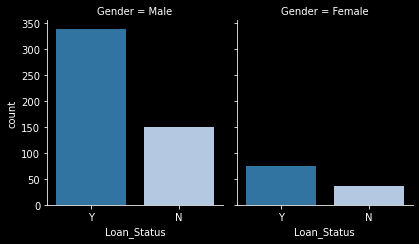

In [39]:
import seaborn as sns
# Plot
g = sns.catplot("Loan_Status", col="Gender", col_wrap=4,
                data=nominal_variables[nominal_variables.Gender.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')
plt.show()

In [40]:
nominal_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
 6   Loan_Status    614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


/var/folders/f2/t6c58sg572j8wwkvdtr7lphr0000gn/T/ipykernel_37202/1032398201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominal_variables[each]=nominal_variables[each].fillna('dnd')
/var/folders/f2/t6c58sg572j8wwkvdtr7lphr0000gn/T/ipykernel_37202/1032398201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nominal_variables[each]=label_encoder.fit_transform(nominal_variables[each])


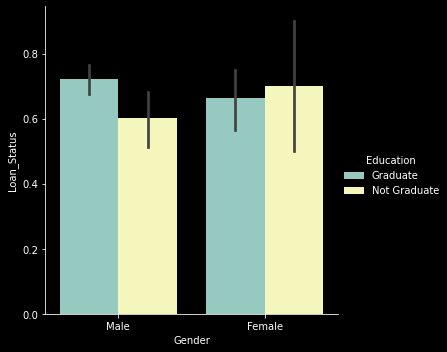

In [41]:

# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
lis = ['Loan_Status']
for each in lis:
  nominal_variables[each]=nominal_variables[each].fillna('dnd')
  nominal_variables[each]=label_encoder.fit_transform(nominal_variables[each])


sns.catplot(x="Gender", y="Loan_Status", hue="Education", kind="bar", data=nominal_variables)

In [42]:
f = plt.figure(figsize=(10, 5))
corr = df.corr()
corr.style.background_gradient(vmax=.7,vmin=-.7,cmap='BuPu')




,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Figure size 720x360 with 0 Axes>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


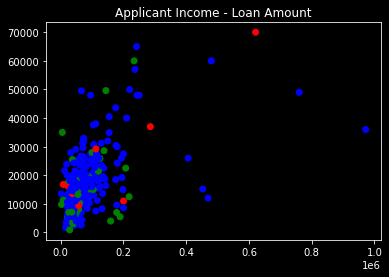

In [44]:



from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer #fills in missing values 


X=df['ApplicantIncome']#.clip(1,15000)
Y=df['LoanAmount']

fig, ax = plt.subplots()


colors = {'Female':'green', 'Male':'blue','dnd':'red'}
ax.set_title("Applicant Income - Loan Amount")

ax.scatter(X, Y, c=df['Gender'].map(colors))


plt.show()






#features
#clusters can I give loan or not. 

In [45]:
df[df['LoanAmount'].isna()==True]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,70188,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,27300,24804.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,59340,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,28740,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,dnd,81384,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,dnd,Graduate,No,163800,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,55824,42996.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,89412,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,46380,19680.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,47904,0.0,NaN,180.0,1.0,Urban,N


In [46]:
len(X[:-1])

613

In [47]:
df[df['ApplicantIncome'].isna()==True]
df['ApplicantIncome'].max()


972000

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:

#impute
from sklearn.impute import SimpleImputer #fills in missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
imp = IterativeImputer(max_iter=10, random_state=1)

numeric_variables = df.select_dtypes(include = ['number'])
for columns in numeric_variables:
    df[columns]=imp.fit_transform(df[columns].to_numpy().reshape(-1, 1))
    

In [50]:
#from sklearn.impute import SimpleImputer #fills in missing values
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer 

#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#df['ApplicantIncome']=imp_mean.fit_transform(df['ApplicantIncome'].to_numpy().reshape(-1, 1))
#df['LoanAmount']=imp_mean.fit_transform(df['LoanAmount'].to_numpy().reshape(-1, 1))


614
614


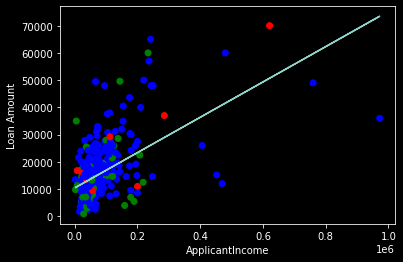

In [51]:
from sklearn.linear_model import LinearRegression

import pylab as pl
import numpy as np

X=df['ApplicantIncome'].to_numpy().reshape(-1, 1)#
y=df['LoanAmount'].to_numpy().reshape(-1, 1)
c=df['Gender'].to_numpy().reshape(-1, 1)
regressor = LinearRegression()
qqq=regressor.fit(X, y)

#to plot, use regressor.coef_

fig, ax = plt.subplots()

colors = {'Female':'green', 'Male':'blue','dnd':'red'}
print(len(X[::1]))
print(len(y[::1]))
ax.scatter(X[::1], y[::1],c=df['Gender'].map(colors))
m, b = np.polyfit(np.array(df['ApplicantIncome']), np.array(df['LoanAmount']), 1)
ax.set_ylabel('Loan Amount')
ax.set_xlabel('ApplicantIncome')
ax.plot(X, m*X + b)
plt.show()








In [52]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,70188.0,0.0,14641.216216,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,54996.0,18096.0,12800.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,36000.0,0.0,6600.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,30996.0,28296.0,12000.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,72000.0,0.0,14100.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,34800.0,0.0,7100.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,49272.0,0.0,4000.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,96864.0,2880.0,25300.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,90996.0,0.0,18700.000000,360.0,1.0,Urban,Y


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



                Loan_ID
Credit_History         
0.000000             89
0.842199             50
1.000000            475


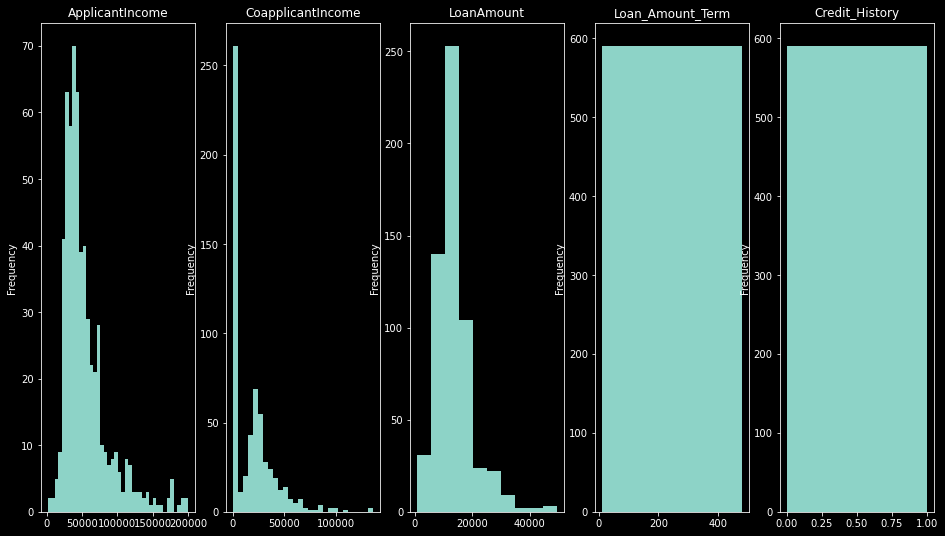

In [53]:
print(df[['Loan_ID','Credit_History']].groupby('Credit_History').count())
#give dnd to missing nominal values 
import math
numeric_variables = df.select_dtypes(include = ['number'])
w = 5000
numeric_variables = numeric_variables[numeric_variables['ApplicantIncome']<200000]
numeric_variables = numeric_variables[numeric_variables['CoapplicantIncome']<200000]


#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(numeric_variables.columns), figsize=(16,9))
for col, ax in zip(numeric_variables, axes):
    n = math.ceil((numeric_variables[col].max() - numeric_variables[col].min())/w)
    numeric_variables[col].sort_index().plot.hist(ax=ax, title=col,bins=n)
    
plt.style.use('dark_background')
plt.show()




Look at box plots to understand the distributions. 

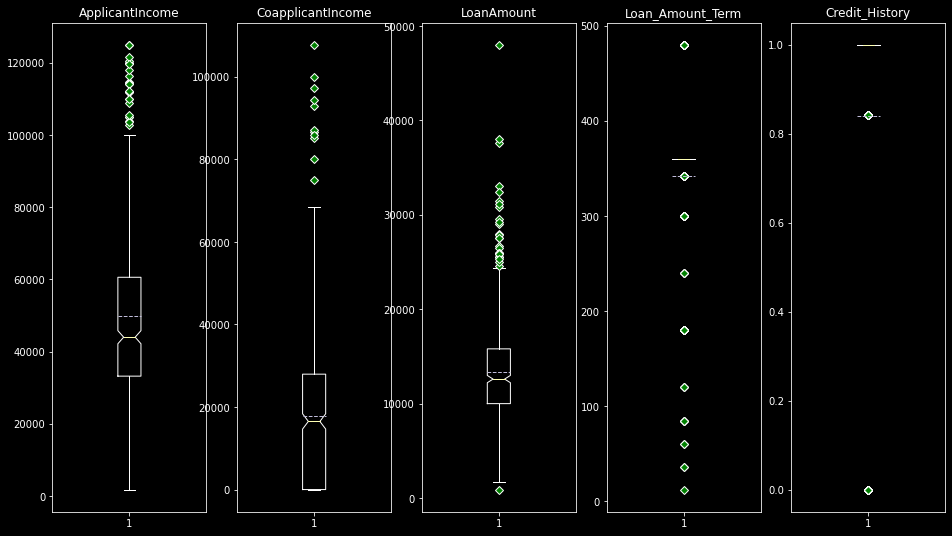

In [54]:

#give dnd to missing nominal values 
import math
numeric_variables = df.select_dtypes(include = ['number'])
w = 5000
numeric_variables = numeric_variables[numeric_variables['ApplicantIncome']<125001]
numeric_variables = numeric_variables[numeric_variables['CoapplicantIncome']<125001]

green_diamond = dict(markerfacecolor='g', marker='D')
#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(numeric_variables.columns), figsize=(16,9))
for col, ax in zip(numeric_variables, axes):
    n = math.ceil((numeric_variables[col].max() - numeric_variables[col].min())/w)
    ax.boxplot(numeric_variables[col],notch=True, flierprops=green_diamond,meanline=True,showmeans=True)
    ax.set_title(col)
plt.style.use('dark_background')
plt.show(2)



Look at the distribution of income segregated  by `Education`

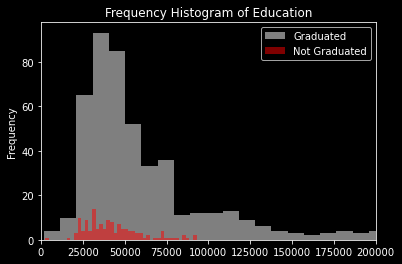

In [55]:

x1 = df.loc[df.Education=='Not Graduate', 'ApplicantIncome']
x2 = df.loc[df.Education=='Graduate', 'ApplicantIncome']
kwargs = dict(alpha=0.5, bins=100)
plt.hist(x2, **kwargs, color='w', label='Graduated')
plt.hist(x1, **kwargs, color='r', label='Not Graduated')
plt.gca().set(title='Frequency Histogram of Education', ylabel='Frequency')
plt.xlim(0,200000)
plt.legend()

/Users/digitalminimal/opt/miniconda3/envs/the_one/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


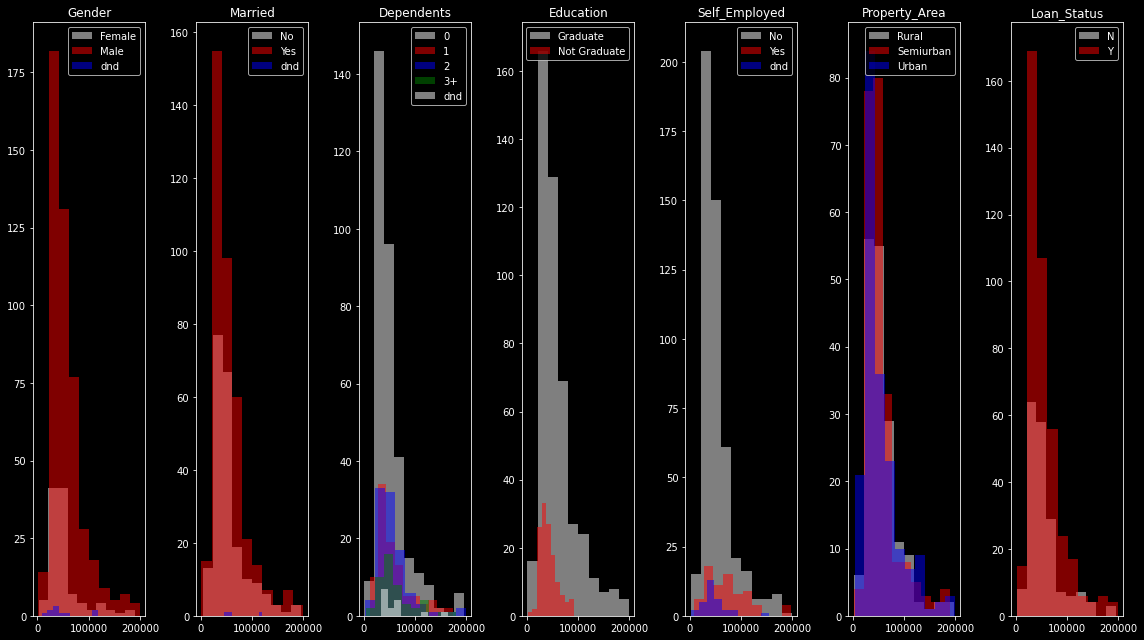

In [56]:
from itertools import cycle

li = colorlist=['w','r','b','g','w']

thisdf=df
thisdf = thisdf[thisdf['ApplicantIncome']<200000]
kwargs = dict(alpha=0.5, bins=10)
#give dnd to missing nominal values 
nominal_variables = thisdf.select_dtypes(exclude = ['number'])
nominal_variables.drop('Loan_ID',axis=1,inplace=True)
for each in nominal_variables:
    df[each].fillna('dnd', inplace=True)

#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(nominal_variables.columns), figsize=(16,9))
for col, ax in zip(nominal_variables, axes):
   # ax = df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)
    licycle = cycle(li)
    # Prime the pump
    nextelem = next(licycle)
    
    for nominal_values in np.unique(df[col]):
        thiselem, nextelem = nextelem, next(licycle)
        thehisto = thisdf.loc[thisdf[col]==nominal_values, 'ApplicantIncome']
        ax.hist(thehisto, **kwargs, color=thiselem, label=nominal_values)
    ax.legend()
    ax.set_title(col)
    
plt.tight_layout()    
plt.style.use('dark_background')
plt.show()

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


/Users/digitalminimal/opt/miniconda3/envs/the_one/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: Grouper for 'Loan_Status' not 1-dimensional

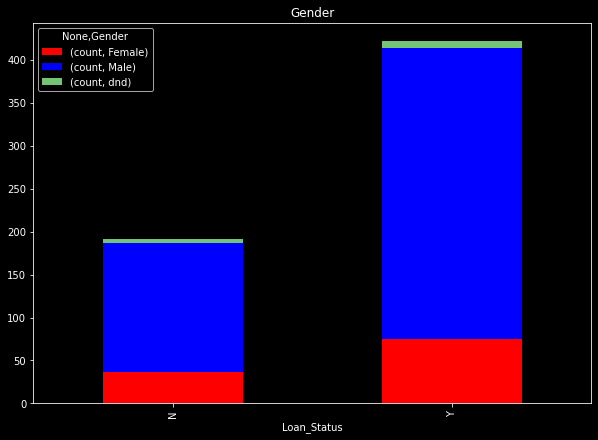

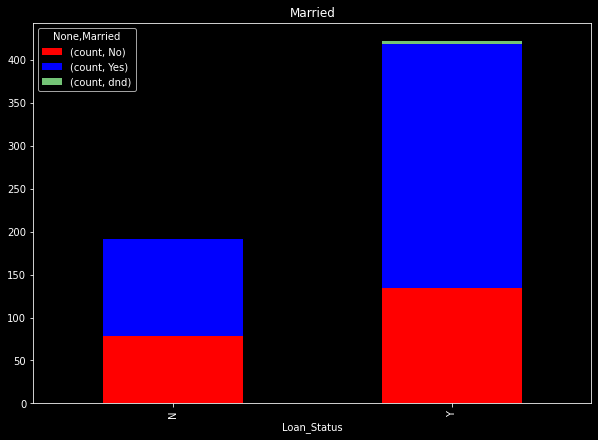

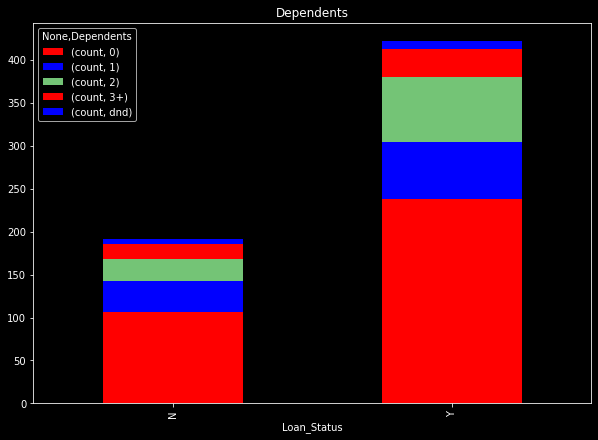

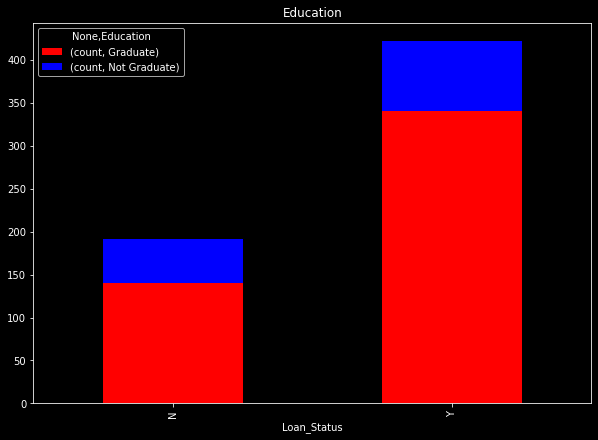

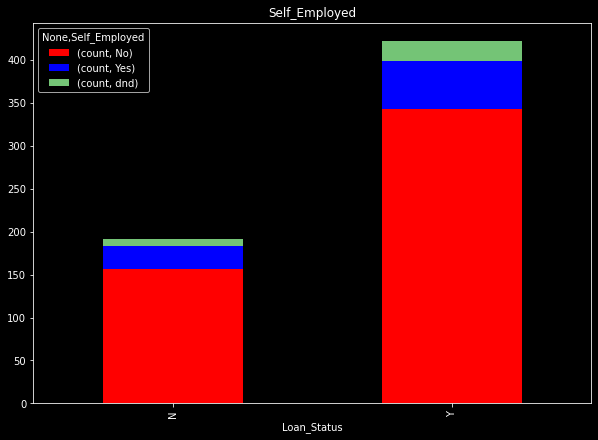

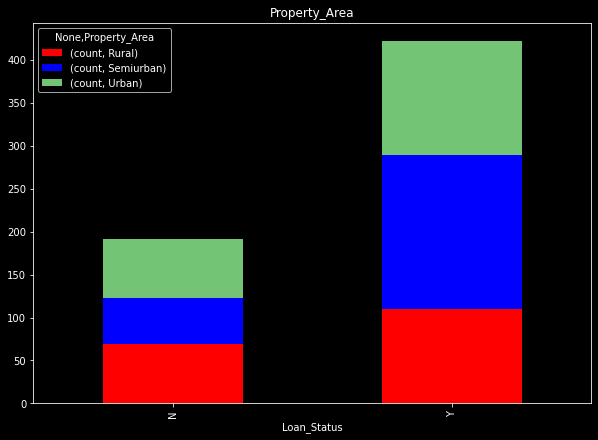

In [58]:



colors = ["red", "blue","#74C476"]


thisdf=df
thisdf['TotalIncome'] = thisdf['ApplicantIncome']+thisdf['CoapplicantIncome']


#give dnd to missing nominal values 
nominal_variables = thisdf.select_dtypes(exclude = ['number'])
nominal_variables.drop('Loan_ID',axis=1,inplace=True)
for each in nominal_variables:
    thisdf[each].fillna('dnd', inplace=True)

#loop true nominal columns then display an histogram

for col in nominal_variables:
    pivot_df = thisdf.pivot_table(index='Loan_Status', columns=col, values='ApplicantIncome',aggfunc=['count'])
    pivot_df.plot.bar(title=col ,stacked=True, color=colors, figsize=(10,7))
print(pivot_df)
    

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [ ]:
columns_names = df.select_dtypes(exclude= ['number']).columns
columns_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:


#this should be in EDA only. # we will be scaling this down anyway, and scaling is done independently. 
#Annualize income
#df.describe() # to check on nulls 
#df['ApplicantIncome']=df['ApplicantIncome']*12
#df['CoapplicantIncome']=df['CoapplicantIncome']*12
#Loans to hundreds of thousands 
#df['LoanAmount']=df['LoanAmount']*100

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#load
df = pd.read_csv("data.csv") 
df.head()

#toal income 
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

#need 
def impute_nominal(df):
    #nominal_variables = df.select_dtypes(exclude = ['number'])
    #nominal_variables.drop('Loan_ID',axis=1,inplace=True)
    for each in df:
        df[each].fillna('dnd', inplace=True)
    return df
    #df.apply(lambda x: x.fillna('dnd', inplace=True) #in the column transformer( the transfomer will do 
    #one feature at a time), we will call it.
#columns_names = df.select_dtypes(exclude= ['number']).columns

#this puts the function transformer into my impute transformer.
impute_transformer = FunctionTransformer(impute_nominal)
preprocess=make_column_transformer( 
    (
       impute_transformer,['Gender','Education'] #list of columns 
    ), #add scale here
    
    remainder='passthrough'# will passthru columns not include
)

pipe=make_pipeline(preprocess)
test=_transform(df)
test=pd.DataFrame(test,columns=df.columns)
    #function transformer ( columntransformer in parappel )
    #Missing Nominal values to dnd #
    #nominal_variables = df.select_dtypes(exclude = ['number'])
    #nominal_variables.drop('Loan_ID',axis=1,inplace=True)
    #for each in nominal_variables:
        #df[each].fillna('dnd', inplace=True)
    


preprocess=make_column_transformer( 
    (
       impute_transformer,['Gender','Education'] #list of columns 
    ), #add scale here
    
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=KFold(),   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_
    remainder='passthrough'# will passthru columns not include
)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#load
df = pd.read_csv("data.csv") 
df.head()

#toal income 
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)
print(df.head())

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=101)


from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
# integer_features = list(X.columns[X.dtypes == 'int64'])
# continuous_features = list(X.columns[X.dtypes == 'float64'])
# categorical_features = list(X.columns[X.dtypes == 'object'])

nominal_variables = list(X.select_dtypes(exclude = ['number']))
numeric_variables = list(X.select_dtypes(include = ['number']))

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

impute_dnd = SimpleImputer(strategy='constant',fill_value='dnd')
impute_numeric = SimpleImputer(strategy='median')

#Features=list_of_features.drop(['Loan_ID','Loan_Status_N'])

preprocess = make_column_transformer(
    (make_pipeline(impute_dnd,ohe),nominal_variables),
    (make_pipeline(impute_numeric, scaler), numeric_variables),
    remainder="passthrough"
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# create a pipeline
#pipe = make_pipeline(preprocess, GaussianNB())
logisticregression=LogisticRegression()
pipe = make_pipeline(preprocess, logisticregression)

from sklearn.model_selection import cross_val_score
# cross-validate the pipeline
print(cross_val_score(pipe, X, y).mean())

# fit the pipeline and make predictions
# X_train, X_test, y_train, y_test
pipe.fit(X_train, y_train)

pipe.predict(X)

import joblib
joblib.dump(pipe, "pipe.joblib")

#load pipeline
model = joblib.load('pipe.joblib')

model.predict(X_test)

#you are here 
# set up our parameters grid
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}
# param_grid = {
#     'penalty': ('l1', 'l2'),
#     'C': np.logspace(-4, 4, 20),
#     'max_iter' : [10, 100]
# }
param_grid = [
    {'logisticregression' : [logisticregression],
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 20),
    'logisticregression__solver' : ['liblinear']}]
#     # {'RandomForestClassifier' : [RandomForestClassifier()],
#     # 'RandomForestClassifier__n_estimators' : list(range(10,101,10)),
#     # 'RandomForestClassifier__max_features' : list(range(6,32,5))}


# create a Grid Search object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# fit the model and tune parameters



grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n\n=======score=======")
print(grid_search.score)
print("\n\n=======Best score=======")
print(grid_search.best_score_)



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  TotalIncome  
0             1.0         Urban           Y       5849.0  
1             1.0         Rural         

In [ ]:
y_pred= grid_search.predict(X_test)


In [ ]:
X_test.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,1950.0


In [ ]:
y_test

216    N
55     Y
593    Y
438    N
351    N
      ..
116    Y
342    Y
538    N
547    Y
521    Y
Name: Loan_Status, Length: 185, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
ModelAccuracy =("Accuracy:",accuracy_score(y_test, y_pred))
ModelAccuracy

('Accuracy:', 0.7837837837837838)

In [ ]:
print(LogisticRegression().get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#load
df = pd.read_csv("data.csv") 
df.head()

#toal income 
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=101)


from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
# integer_features = list(X.columns[X.dtypes == 'int64'])
# continuous_features = list(X.columns[X.dtypes == 'float64'])
# categorical_features = list(X.columns[X.dtypes == 'object'])

#select nomival and numeric columns for future transformation
nominal_variables = list(X.select_dtypes(exclude = ['number']))
numeric_variables = list(X.select_dtypes(include = ['number']))

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

impute_dnd = SimpleImputer(strategy='constant',fill_value='dnd')
impute_numeric = SimpleImputer(strategy='median')

#Features=list_of_features.drop(['Loan_ID','Loan_Status_N'])

preprocess = make_column_transformer(
    (make_pipeline(impute_dnd,ohe),nominal_variables),
    (make_pipeline(impute_numeric, scaler), numeric_variables),
    remainder="passthrough"
)

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# create a pipeline
#pipe = make_pipeline(preprocess, GaussianNB())


logisticregression = LogisticRegression()
randomforestclassifier = RandomForestClassifier()

# Build an transformer from PCA and Univariate selection:
# combined_models = make_union([("randomforestclassifier", randomforestclassifier), ("logisticregression", logisticregression)])

pipe = make_pipeline(preprocess, logisticregression)
# pipe_lr = make_pipeline(preprocess, logisticregression)
# pipe_rf = make_pipeline(preprocess, randomforestclassifier)


from sklearn.model_selection import cross_val_score
# cross-validate the pipeline
print(cross_val_score(pipe, X, y).mean())

# fit the pipeline and make predictions
# X_train, X_test, y_train, y_test
pipe.fit(X_train, y_train)

pipe.predict(X_train)

import joblib
joblib.dump(pipe, "pipe.joblib")

#load pipeline
model = joblib.load('pipe.joblib')

model.predict(X_test)

#you are here 2
# set up our parameters grid


# param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}
# param_grid = {
#     'penalty': ('l1', 'l2'),
#     'C': np.logspace(-4, 4, 20),
#     'max_iter' : [10, 100]
# }
param_grid = [
    {'logisticregression' : [logisticregression],
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 20),
    'logisticregression__solver' : ['liblinear']}
    # },
    #   {'randomforestclassifier' : [randomforestclassifier],
    #   'randomforestclassifier__n_estimators' : list(range(10,101,10)),
    #   'randomforestclassifier__max_features' : list(range(6,32,5))}
]

# create a Grid Search object
from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV([pipe_lr,pipe_rf], param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# fit the model and tune parameters



grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


0.8078368652538984
Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'logisticregression': LogisticRegression(C=0.08858667904100823, solver='liblinear'), 'logisticregression__C': 0.08858667904100823, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [ ]:
X_test.iloc[[0]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,1950.0


In [ ]:
model = joblib.load('pipe.joblib')
# client_data = json.loads("mini-project.json")
# print(client_data)
# fit the pipeline and make predictions
model.predict(X_test.iloc[[0]])

# import joblib
# joblib.dump(pipe, "pipe.joblib")

# #load pipeline
# model = joblib.load('pipe.joblib')
# mini_project_app.py
# model.predict(X_new)

array(['Y'], dtype=object)

In [ ]:
df.head(1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0


In [ ]:

#impute
from sklearn.impute import SimpleImputer #fills in missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
imp = IterativeImputer(max_iter=10, random_state=1)

numeric_variables = df.select_dtypes(include = ['number'])
for columns in numeric_variables:
    df[columns]=imp.fit_transform(df[columns].to_numpy().reshape(-1, 1))


# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 


    

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

                Loan_ID
Credit_History         
0.000000             89
0.842199             50
1.000000            475


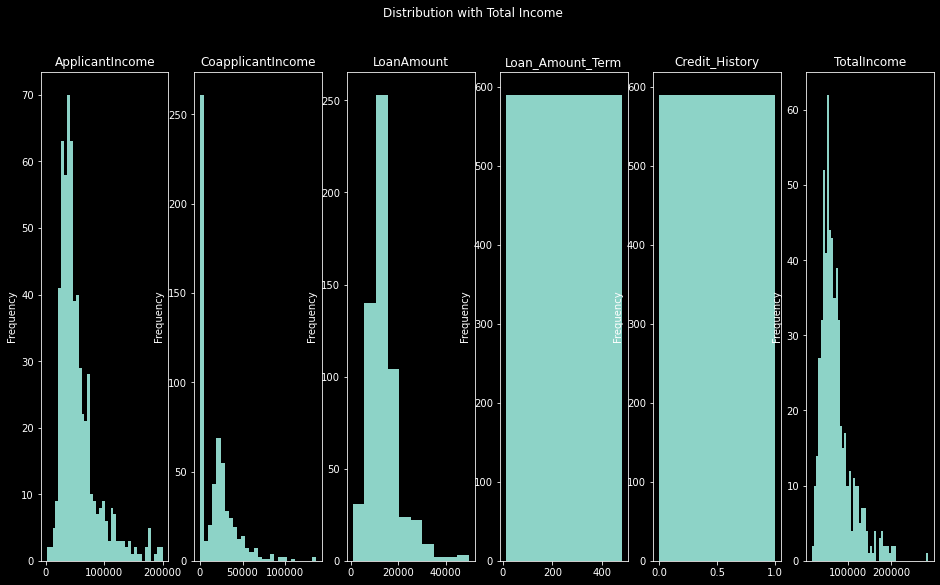

In [ ]:
print(df[['Loan_ID','Credit_History']].groupby('Credit_History').count())
#give dnd to missing nominal values 
import math
numeric_variables = df.select_dtypes(include = ['number'])
w = 5000
numeric_variables = numeric_variables[numeric_variables['ApplicantIncome']<200000]
numeric_variables = numeric_variables[numeric_variables['CoapplicantIncome']<200000]
numeric_variables['TotalIncome']=numeric_variables['ApplicantIncome']+numeric_variables['CoapplicantIncome']

#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(numeric_variables.columns), figsize=(16,9))
for col, ax in zip(numeric_variables, axes):
    n = math.ceil((numeric_variables[col].max() - numeric_variables[col].min())/w)
    numeric_variables[col].sort_index().plot.hist(ax=ax, title=col,bins=n)
fig.suptitle("Distribution with Total Income")
plt.style.use('dark_background')
plt.show()



                Loan_ID
Credit_History         
0.000000             89
0.842199             50
1.000000            475


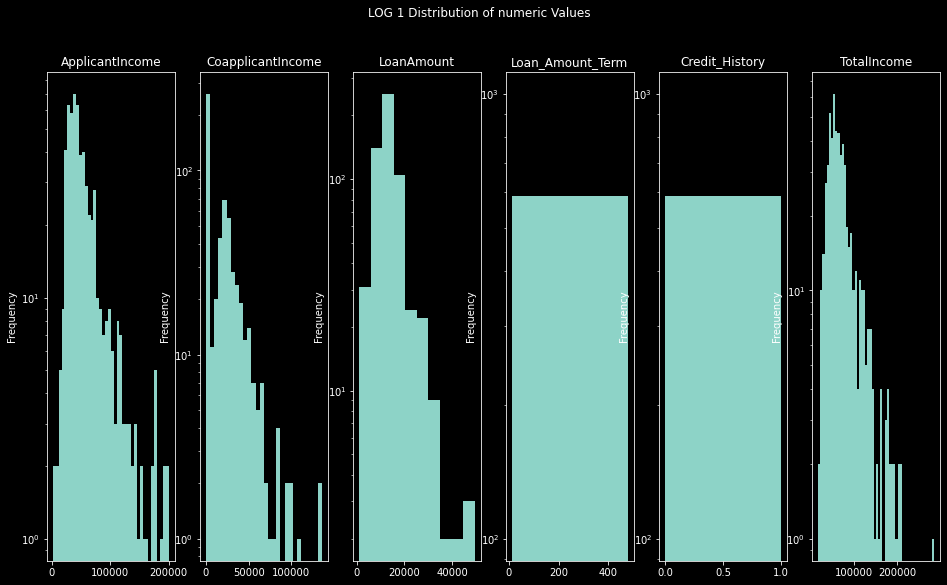

In [ ]:
print(df[['Loan_ID','Credit_History']].groupby('Credit_History').count())
#give dnd to missing nominal values 
import math
numeric_variables = df.select_dtypes(include = ['number'])
w = 5000
numeric_variables = numeric_variables[numeric_variables['ApplicantIncome']<200000]
numeric_variables = numeric_variables[numeric_variables['CoapplicantIncome']<200000]
numeric_variables['TotalIncome']=numeric_variables['ApplicantIncome']+numeric_variables['CoapplicantIncome']

#loop true nominal columns then display an histogram
fig, axes = plt.subplots(ncols=len(numeric_variables.columns), figsize=(16,9))
for col, ax in zip(numeric_variables, axes):
    n = math.ceil((numeric_variables[col].max() - numeric_variables[col].min())/w)
    numeric_variables[col].sort_index().plot.hist(ax=ax, title=col,bins=n,log=1)
fig.suptitle("LOG 1 Distribution of numeric Values")
plt.style.use('dark_background')
plt.show()



## 4. Building a Predictive Model

In [ ]:
from sklearn.model_selection import KFold

print(df.info())
df.drop(['Loan_ID'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(6), object(8)
memory usage: 67.3+ KB
None


In [ ]:

dummy_df = pd.get_dummies(df)
dummy_df


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_dnd,Married_No,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_dnd,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,70188.0,0.0,14641.216216,360.0,1.0,70188.0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,1
1,54996.0,18096.0,12800.000000,360.0,1.0,73092.0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,36000.0,0.0,6600.000000,360.0,1.0,36000.0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,30996.0,28296.0,12000.000000,360.0,1.0,59292.0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,1
4,72000.0,0.0,14100.000000,360.0,1.0,72000.0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,34800.0,0.0,7100.000000,360.0,1.0,34800.0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
610,49272.0,0.0,4000.000000,180.0,1.0,49272.0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
611,96864.0,2880.0,25300.000000,360.0,1.0,99744.0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
612,90996.0,0.0,18700.000000,360.0,1.0,90996.0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1


In [ ]:
#Features=list_of_features.drop(['Loan_ID','Loan_Status_N'])
dummy_df = pd.get_dummies(df)
dummy_df
y=dummy_df['Loan_Status_Y']
X=dummy_df.drop(['Loan_Status_N','Loan_Status_Y'],axis=1)



X


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_dnd,Married_No,...,Dependents_3+,Dependents_dnd,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_dnd,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,70188.0,0.0,14641.216216,360.0,1.0,70188.0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,54996.0,18096.0,12800.000000,360.0,1.0,73092.0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2,36000.0,0.0,6600.000000,360.0,1.0,36000.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,30996.0,28296.0,12000.000000,360.0,1.0,59292.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,72000.0,0.0,14100.000000,360.0,1.0,72000.0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,34800.0,0.0,7100.000000,360.0,1.0,34800.0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
610,49272.0,0.0,4000.000000,180.0,1.0,49272.0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
611,96864.0,2880.0,25300.000000,360.0,1.0,99744.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
612,90996.0,0.0,18700.000000,360.0,1.0,90996.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:

kf = KFold(n_splits=5, shuffle=True)
X = np.array(X)
y = np.array(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X_test: ", X_test)
    


X_test:  [[5.49960e+04 1.80960e+04 1.28000e+04 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.54092e+05 1.31616e+05 3.49000e+04 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [5.86440e+04 0.00000e+00 1.33000e+04 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [4.41120e+04 5.16120e+04 1.72000e+04 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [3.48000e+04 0.00000e+00 7.10000e+03 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [9.68640e+04 2.88000e+03 2.53000e+04 ... 0.00000e+00 0.00000e+00
  1.00000e+00]]
X_test:  [[3.60000000e+04 0.00000000e+00 6.60000000e+03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.09960000e+04 2.82960000e+04 1.20000000e+04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.50040000e+04 5.03520000e+04 2.67000000e+04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [4.99200000e+03 5.00004000e+05 3.50000000e+04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.47280000e+04 3.35040000e+04 1.55000000e+04 ... 1.00000000e+00
  0.00000000e+00 0.0000

In [ ]:
from sklearn.naive_bayes import GaussianNB
trained_model = GaussianNB().fit(X_train, y_train)
accuracy = trained_model.score(X_train, y_train)
print(f'The hard predictions were right {100*accuracy:.1f}% of the time')

y_test_predict_proba = trained_model.predict_proba(X_test)[:, 1] # remove the slice to have ALL predictions 

The hard predictions were right 68.5% of the time


NameError: name 'y_test_predict_proba' is not defined

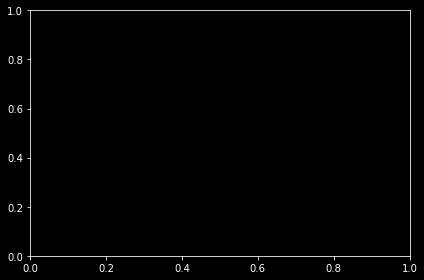

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(y_test_predict_proba, bins=10)
plt.show()



NameError: name 'y_test_predict_proba' is not defined

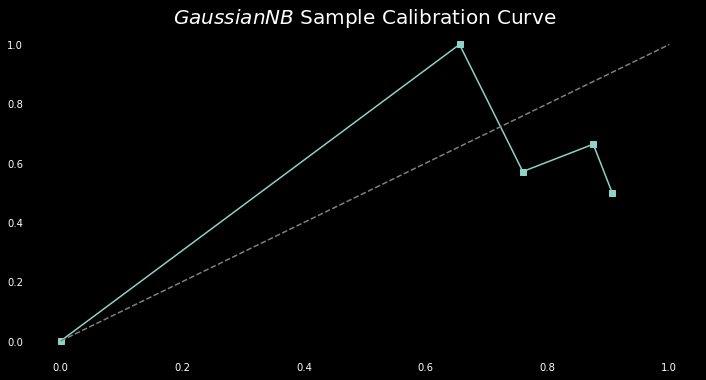

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("$GaussianNB$ Sample Calibration Curve", fontsize=20); pass

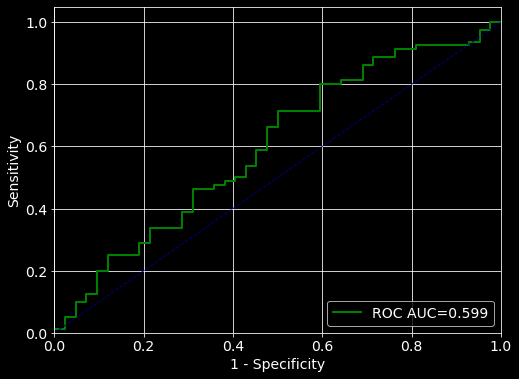

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()

fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_test_predict_proba)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

Try paramater grid search to improve the results

In [ ]:
#MultinomialNB()
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=KFold(),   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.23101297000831597}

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Method 1 with make_column_selector and make pipeline : BEST Method

# set up preprocessing for numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant',fill_value='dnd')
ohe = OneHotEncoder(handle_unknown='ignore')

# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')



# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols))

# create a pipeline
pipe = make_pipeline(preprocessor, LogisticRegression())

preprocess = make_column_transformer(
    (impute_dnd,[columns]),
    (impute_numeric,[other columns]),
    remainder="passthrough"
()

In [ ]:
#gridsearch parameter, cv=5 do this

In [ ]:
import json
X_test.head(1)

data = X_test.head(1).to_json('./mini-project.json', orient='records')
result = X_test.head(1).to_json(orient="records")
parsed = json.loads(result)
json.dumps(parsed, indent=4)  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,7583.0


In [ ]:
import json


data = X_test.to_json('./mini-project.json', orient='records')
result = X_test.to_json(orient="records")
parsed = json.loads(result)
json.dumps(parsed, indent=4)  

'[\n    {\n        "Loan_ID": "LP001722",\n        "Gender": "Male",\n        "Married": "Yes",\n        "Dependents": "0",\n        "Education": "Graduate",\n        "Self_Employed": "No",\n        "ApplicantIncome": 150,\n        "CoapplicantIncome": 1800.0,\n        "LoanAmount": 135.0,\n        "Loan_Amount_Term": 360.0,\n        "Credit_History": 1.0,\n        "Property_Area": "Rural",\n        "TotalIncome": 1950.0\n    },\n    {\n        "Loan_ID": "LP001194",\n        "Gender": "Male",\n        "Married": "Yes",\n        "Dependents": "2",\n        "Education": "Graduate",\n        "Self_Employed": "No",\n        "ApplicantIncome": 2708,\n        "CoapplicantIncome": 1167.0,\n        "LoanAmount": 97.0,\n        "Loan_Amount_Term": 360.0,\n        "Credit_History": 1.0,\n        "Property_Area": "Semiurban",\n        "TotalIncome": 3875.0\n    },\n    {\n        "Loan_ID": "LP002936",\n        "Gender": "Male",\n        "Married": "Yes",\n        "Dependents": "0",\n        "Ed

In [ ]:


pipe.fit(X_test, y_test)
pipe.predict(X_test)

array(['Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

'[\n    {\n        "Loan_ID": "LP001722",\n        "Gender": "Male",\n        "Married": "Yes",\n        "Dependents": "0",\n        "Education": "Graduate",\n        "Self_Employed": "No",\n        "ApplicantIncome": 150,\n        "CoapplicantIncome": 1800.0,\n        "LoanAmount": 135.0,\n        "Loan_Amount_Term": 360.0,\n        "Credit_History": 1.0,\n        "Property_Area": "Rural",\n        "TotalIncome": 1950.0\n    }\n]'

In [ ]:
print(data)

None


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python